In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('dsn.csv')

In [110]:
df

,Price,Shaft_Diameter,Rated_torque,Max_Torque_Rating,Thermal_Rating,Actual_Ratio,Max_Input_Power,Actual_Speed_Rpm
0,110510.0,30.87,9693.77,39671,52.92,3972.50,163.86,1175.68
1,9320.0,67.71,33550.65,27745,6.97,1367.68,145.52,867.02
2,50500.0,32.16,15239.06,25904,8.67,1106.92,149.78,1179.72
3,41960.0,79.95,23330.05,2712,33.43,6933.47,80.86,475.93
4,126500.0,102.58,23240.41,22860,59.76,3322.51,51.76,894.63
...,...,...,...,...,...,...,...,...
3995,83580.0,101.25,21429.74,8618,26.23,2803.91,84.93,264.44
3996,106450.0,37.75,4429.08,19638,33.26,667.99,263.99,512.52
3997,11630.0,24.96,28420.89,39788,65.97,9582.55,92.21,13.11
3998,134300.0,37.46,13454.53,22232,55.82,5072.91,48.70,899.19


# Data Cleaning

In [111]:
df.describe()

,Price,Shaft_Diameter,Rated_torque,Max_Torque_Rating,Thermal_Rating,Actual_Ratio,Max_Input_Power,Actual_Speed_Rpm
count,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,88098.90250,69.163210,18638.422635,19924.406000,47.564602,5123.222058,182.667722,617.785337
std,47256.57199,28.951001,10693.151637,11575.362377,27.469645,3015.282793,105.812256,344.377569
min,5230.00000,19.010000,71.330000,100.000000,0.760000,4.480000,0.030000,0.410000
25%,47507.50000,44.242500,9567.275000,9921.000000,23.800000,2517.340000,91.020000,325.527500
50%,88740.00000,68.650000,18398.285000,19774.000000,47.465000,5049.080000,184.140000,629.490000
75%,128497.50000,93.660000,27923.322500,29897.250000,71.450000,7781.170000,272.932500,916.292500
max,169880.00000,119.900000,37166.110000,39995.000000,94.980000,10386.740000,367.930000,1196.610000


In [112]:
missing_values = df.isnull().sum()

In [113]:
print(missing_values)

Price                0
Shaft_Diameter       0
Rated_torque         0
Max_Torque_Rating    0
Thermal_Rating       0
Actual_Ratio         0
Max_Input_Power      0
Actual_Speed_Rpm     0
dtype: int64


# Data Visualization

<Axes: xlabel='Shaft_Diameter', ylabel='Price'>

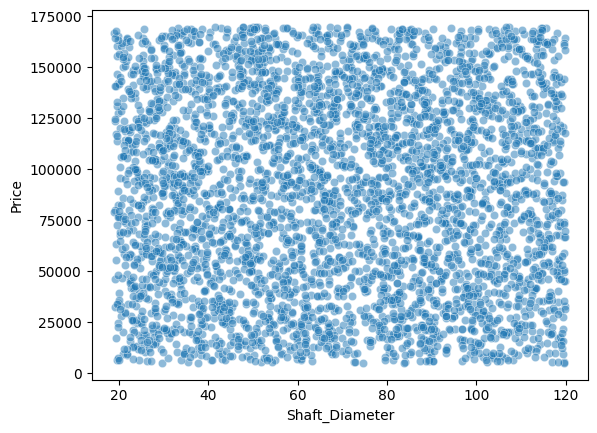

In [114]:
sns.scatterplot(data=df, x='Shaft_Diameter', y='Price', alpha=0.5)

Text(0, 0.5, 'Count')

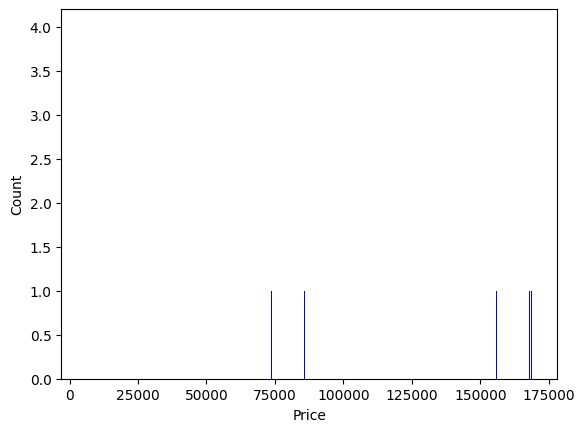

In [115]:
import matplotlib.pyplot as plt
counts = df['Price'].value_counts()
plt.bar(counts.index, counts.values, color='blue')
plt.xlabel('Price')
plt.ylabel('Count')

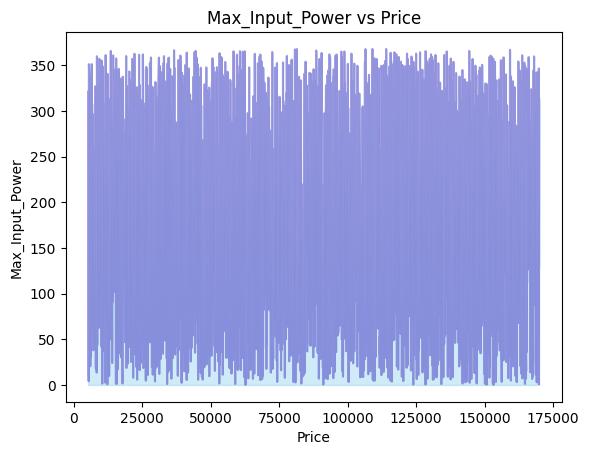

In [116]:
import numpy as np
import matplotlib.pyplot as plt
groups = df.groupby('Price').mean()
x = groups.index
y = groups['Max_Input_Power']
plt.fill_between(x, y, color="skyblue", alpha=0.4)
plt.plot(x, y, color="Slateblue", alpha=0.6)
plt.xlabel('Price')
plt.ylabel('Max_Input_Power')
plt.title('Max_Input_Power vs Price')
plt.show()

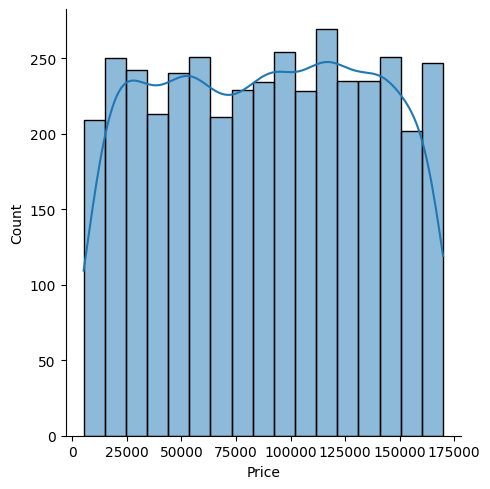

In [117]:
sns.displot(data=df, x='Price', kde=True)

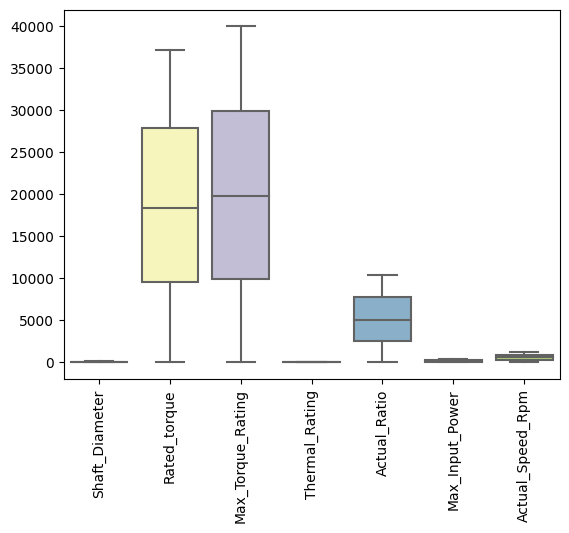

In [118]:
sns.boxplot(data=df.drop('Price', axis=1), palette='Set3')
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

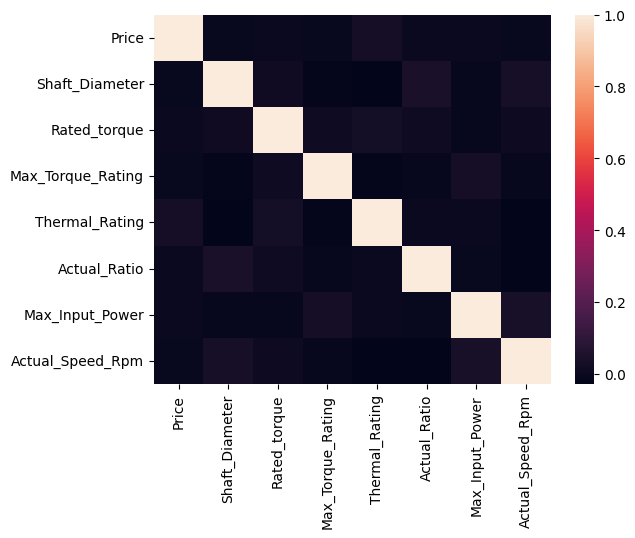

In [119]:
sns.heatmap(df.corr())

In [66]:
X = df.drop(columns=['Price'])
y = df['Price']

# Data Splitting

In [67]:
X

,Shaft_Diameter,Rated_torque,Max_Torque_Rating,Thermal_Rating,Actual_Ratio,Max_Input_Power,Actual_Speed_Rpm
0,18.66,59.66,112.33,0.85,3.18,0.01,0.12
1,18.69,67.57,123.54,0.88,5.84,0.11,0.38
2,18.71,75.47,134.74,0.90,8.50,0.20,0.65
3,18.74,83.38,145.95,0.93,11.16,0.30,0.91
4,18.76,91.29,157.16,0.96,13.82,0.40,1.17
...,...,...,...,...,...,...,...
3995,117.77,31652.37,44886.88,107.41,10632.59,386.55,1046.54
3996,117.79,31660.28,44898.09,107.44,10635.25,386.65,1046.81
3997,117.82,31668.19,44909.30,107.47,10637.91,386.75,1047.07
3998,117.84,31676.10,44920.50,107.49,10640.57,386.84,1047.33


In [68]:
y

0         5930.0
1         5970.0
2         6020.0
3         6070.0
4         6120.0
          ...   
3995    193490.0
3996    193530.0
3997    193580.0
3998    193630.0
3999    193680.0
Name: Price, Length: 4000, dtype: float64

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Fitting the Algorithms

In [70]:
Lin=LinearRegression() 
Log=LogisticRegression() 
Las=Lasso() 
Rid=Ridge() 
Eln=ElasticNet()

In [71]:
Lin.fit(X_train,y_train)

LinearRegression()

In [72]:
Log.fit(X_train,y_train)

LogisticRegression()

In [73]:
Las.fit(X_train,y_train)

Lasso()

In [74]:
Rid.fit(X_train,y_train)

Ridge()

In [75]:
Eln.fit(X_train,y_train)

ElasticNet()

In [76]:
y_pred_Lin=Lin.predict(X_test)

In [77]:
y_pred_Log=Log.predict(X_test)

In [78]:
y_pred_Las=Las.predict(X_test)

In [79]:
y_pred_Rid=Rid.predict(X_test)

In [80]:
y_pred_Eln=Eln.predict(X_test)

# User Input Prediction

In [107]:
result = Lin.predict(pd.DataFrame([[117.77,31652.37,44886.88,107.41,10632.59,386.55,1046.54]], columns=['Shaft_Diameter','Rated_torque','Max_Torque_Rating','Thermal_Rating','Actual_Ratio','Max_Input_Power','Actual_Speed_Rpm']))
print(result)

[193487.32451256]


In [82]:
result = Log.predict(pd.DataFrame([[117.77,31652.37,44886.88,107.41,10632.59,386.55,1046.54]], columns=['Shaft_Diameter','Rated_torque','Max_Torque_Rating','Thermal_Rating','Actual_Ratio','Max_Input_Power','Actual_Speed_Rpm']))
print(result)

[193680.]


In [83]:
result = Las.predict(pd.DataFrame([[117.77,31652.37,44886.88,107.41,10632.59,386.55,1046.54]], columns=['Shaft_Diameter','Rated_torque','Max_Torque_Rating','Thermal_Rating','Actual_Ratio','Max_Input_Power','Actual_Speed_Rpm']))
print(result)

[193492.73327609]


In [84]:
result = Rid.predict(pd.DataFrame([[117.77,31652.37,44886.88,107.41,10632.59,386.55,1046.54]], columns=['Shaft_Diameter','Rated_torque','Max_Torque_Rating','Thermal_Rating','Actual_Ratio','Max_Input_Power','Actual_Speed_Rpm']))
print(result)

[193487.31786696]


In [85]:
result = Eln.predict(pd.DataFrame([[117.77,31652.37,44886.88,107.41,10632.59,386.55,1046.54]], columns=['Shaft_Diameter','Rated_torque','Max_Torque_Rating','Thermal_Rating','Actual_Ratio','Max_Input_Power','Actual_Speed_Rpm']))
print(result)

[193490.24939614]


# Model Evalutaion

In [86]:
print('LinearRegression:\n')  
print('R2 score',r2_score(y_test,y_pred_Lin))
r2 = r2_score(y_test, y_pred_Lin)
n = len(X_test)
p = 8
adj_r2 = 1 - ((1 - r2)*(n - 1)/(n - p - 1))
print("Adjusted R-squared:", adj_r2)
print('Mean absolute error',mean_absolute_error(y_test,y_pred_Lin))
print('Mean squared error',mean_squared_error(y_test,y_pred_Lin))
mse = mean_squared_error(y_test, y_pred_Lin)
rmse = np.sqrt(mse)
print('Root Mean squared error:', rmse)

LinearRegression:

R2 score 0.9999999972389934
Adjusted R-squared: 0.9999999972110691
Mean absolute error 2.498352405031701
Mean squared error 8.261828849876867
Root Mean squared error: 2.874339724158727


In [99]:
print('LogisticRegression:\n') 
print('R2 score',r2_score(y_test,y_pred_Log))
r2 = r2_score(y_test, y_pred_Log)
n = len(X_test)
p = 8
adj_r2 = 1 - ((1 - r2)*(n - 1)/(n - p - 1))
print("Adjusted R-squared:", adj_r2)
print('Mean absolute error',mean_absolute_error(y_test,y_pred_Log))
print('Mean squared error',mean_squared_error(y_test,y_pred_Log))
mse = mean_squared_error(y_test, y_pred_Log)
rmse = np.sqrt(mse)
print('Root Mean squared error:', rmse)

LogisticRegression:

R2 score 0.2641722137638084
Adjusted R-squared: 0.2567302133973235
Mean absolute error 36633.8
Mean squared error 2201835812.5
Root Mean squared error: 46923.72334438093


In [100]:
print('Lasso:\n') 
print('R2 score',r2_score(y_test,y_pred_Las))
r2 = r2_score(y_test, y_pred_Las)
n = len(X_test)
p = 8
adj_r2 = 1 - ((1 - r2)*(n - 1)/(n - p - 1))
print("Adjusted R-squared:", adj_r2)
print('Mean absolute error',mean_absolute_error(y_test,y_pred_Las))
print('Mean squared error',mean_squared_error(y_test,y_pred_Las))
mse = mean_squared_error(y_test, y_pred_Las)
rmse = np.sqrt(mse)
print('Root Mean squared error:', rmse)

Lasso:

R2 score 0.9999999874344414
Adjusted R-squared: 0.9999999873073561
Mean absolute error 5.176734131738049
Mean squared error 37.60023387490362
Root Mean squared error: 6.131902957068354


In [101]:
print('Ridge:\n') 
print('R2 score',r2_score(y_test,y_pred_Rid))
r2 = r2_score(y_test, y_pred_Rid)
n = len(X_test)
p = 8
adj_r2 = 1 - ((1 - r2)*(n - 1)/(n - p - 1))
print("Adjusted R-squared:", adj_r2)
print('Mean absolute error',mean_absolute_error(y_test,y_pred_Rid))
print('Mean squared error',mean_squared_error(y_test,y_pred_Rid))
mse = mean_squared_error(y_test, y_pred_Rid)
rmse = np.sqrt(mse)
print('Root Mean squared error:', rmse)

Ridge:

R2 score 0.9999999972445178
Adjusted R-squared: 0.9999999972166494
Mean absolute error 2.4974421023697575
Mean squared error 8.245297941255778
Root Mean squared error: 2.871462683242772


In [102]:
print('ElasticNet:\n')
print('R2 score',r2_score(y_test,y_pred_Eln))
r2 = r2_score(y_test, y_pred_Eln)
n = len(X_test)
p = 8
adj_r2 = 1 - ((1 - r2)*(n - 1)/(n - p - 1))
print("Adjusted R-squared:", adj_r2)
print('Mean absolute error',mean_absolute_error(y_test,y_pred_Eln))
print('Mean squared error',mean_squared_error(y_test,y_pred_Eln))
mse = mean_squared_error(y_test, y_pred_Eln)
rmse = np.sqrt(mse)
print('Root Mean squared error:', rmse)

ElasticNet:

R2 score 0.9999999943111116
Adjusted R-squared: 0.9999999942535754
Mean absolute error 3.3834311697167503
Mean squared error 17.023002459696766
Root Mean squared error: 4.12589414063143


In [103]:
#import pickle

#pickle.dump(df,open('dfn.pkl','wb'))
#pickle.dump(Lin,open('Linn.pkl','wb'))